In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [57]:
data_dir = '../Data'
os.listdir(data_dir)

['sample_submission.csv',
 'train.csv',
 'test.csv',
 'train_data_after_cleaning.csv']

In [58]:
train_dir = data_dir + '/train.csv'
train_df = pd.read_csv(train_dir)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1244162,id3281585,1,2016-06-05 05:07:21,2016-06-05 05:15:06,1,-74.006790,40.743996,-73.999039,40.723717,N,465
736269,id2267199,2,2016-04-15 22:08:07,2016-04-15 22:32:23,6,-73.986580,40.734119,-73.979187,40.683350,N,1456
435936,id3741400,1,2016-06-25 16:55:44,2016-06-25 16:59:13,1,-73.969231,40.766735,-73.956551,40.784012,N,209
475443,id1145230,1,2016-05-22 03:22:41,2016-05-22 03:35:53,1,-73.986862,40.733192,-74.011589,40.714840,N,792
472533,id1827970,1,2016-03-04 20:57:51,2016-03-04 20:59:23,1,-74.008484,40.720840,-74.006905,40.729610,N,92
731932,id0788916,2,2016-01-25 17:41:31,2016-01-25 17:54:34,1,-74.005569,40.706253,-73.974335,40.751007,N,783
1154821,id1853972,2,2016-02-25 07:24:33,2016-02-25 08:10:36,1,-73.863457,40.770248,-73.976860,40.751801,N,2763
1171285,id0657439,2,2016-02-12 14:28:41,2016-02-12 14:41:09,1,-74.005577,40.706280,-73.969528,40.749256,N,748
926176,id0242783,1,2016-01-10 21:07:52,2016-01-10 21:18:29,2,-73.987877,40.721249,-73.946152,40.714527,N,637
1400652,id1923155,1,2016-02-04 15:18:53,2016-02-04 15:28:36,1,-73.964088,40.773605,-73.982132,40.773701,N,583


In [59]:
test_dir = data_dir + '/test.csv'
test_df = pd.read_csv(test_dir)
test_df.sample(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
606122,id1664977,2,2016-01-07 12:53:49,3,-73.997955,40.740971,-73.989815,40.738701,N
52916,id1186618,2,2016-06-15 00:16:28,6,-73.977837,40.746014,-73.942345,40.748711,N
99822,id2121395,2,2016-06-01 08:48:33,2,-73.980988,40.744530,-74.005669,40.726849,N
166691,id1733055,2,2016-05-12 16:14:25,2,-73.956360,40.781254,-73.954849,40.786510,N
101294,id0181499,2,2016-05-31 18:39:56,1,-73.975517,40.760368,-73.999123,40.724110,N
136466,id3643534,2,2016-05-20 22:28:53,1,-73.983589,40.727699,-74.007057,40.710178,N
549729,id0336342,2,2016-01-25 09:47:49,1,-73.956146,40.767651,-73.989532,40.735920,N
69533,id1933718,1,2016-06-09 22:36:56,1,-73.969666,40.753380,-73.984756,40.728943,N
452683,id0039675,1,2016-02-22 08:24:46,1,-73.984589,40.696739,-73.975380,40.755596,N
248819,id0124078,2,2016-04-19 10:03:23,1,-73.953407,40.767567,-73.993881,40.749947,N


In [60]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [61]:
# remove outliers
train_mean = np.mean(train_df['trip_duration'])
train_std = np.std(train_df['trip_duration'])
train_df = train_df[(train_mean - 5 * train_std <= train_df.trip_duration) & (train_df.trip_duration <= train_mean + 5 * train_std)]
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06
mean,1.534303e+00,1.663950e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,8.376007e+02
std,4.988221e-01,1.313619e+00,7.093200e-02,3.288342e-02,7.067477e-02,3.588855e-02,6.694573e+02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.073000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,2.706400e+04


In [62]:
# Convert dates to pd format so we can easily manipulate them
train_df.pickup_datetime = pd.to_datetime(train_df.pickup_datetime)
train_df.loc[:, 'pickup_date'] = train_df.pickup_datetime.dt.date

train_df.dropoff_datetime = pd.to_datetime(train_df.dropoff_datetime)

test_df.pickup_datetime = pd.to_datetime(test_df.pickup_datetime)
test_df.loc[:, 'pickup_date'] = test_df.pickup_datetime.dt.date


In [63]:
# Split the date to Month, Day, Week, and Hour
def split_date(df):
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    df['month'] = df['pickup_datetime'].dt.month
    df['week'] = df['pickup_datetime'].dt.dayofweek
    return df

train_df = split_date(train_df)
test_df = split_date(test_df)

train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week
522977,id0308813,2,2016-05-17 08:17:56,2016-05-17 08:23:29,5,-73.990601,40.756199,-73.989166,40.766029,N,333,2016-05-17,17,8,5,1
830099,id1820240,2,2016-03-15 19:37:17,2016-03-15 19:49:53,1,-73.994781,40.745102,-73.987457,40.768715,N,756,2016-03-15,15,19,3,1
722530,id3798985,2,2016-02-11 20:42:23,2016-02-11 21:00:21,1,-74.008949,40.706249,-73.948730,40.784988,N,1078,2016-02-11,11,20,2,3
600995,id2424627,2,2016-01-17 16:35:38,2016-01-17 16:54:49,2,-73.972710,40.756130,-74.000031,40.721931,N,1151,2016-01-17,17,16,1,6
213452,id1879568,2,2016-01-02 13:53:36,2016-01-02 14:10:08,1,-73.977631,40.757553,-74.004669,40.713352,N,992,2016-01-02,2,13,1,5
1380806,id3734564,2,2016-02-26 12:44:17,2016-02-26 13:07:48,1,-73.974861,40.757477,-74.017174,40.705341,N,1411,2016-02-26,26,12,2,4
1124292,id2068609,1,2016-05-14 15:28:24,2016-05-14 15:38:50,2,-74.008049,40.741993,-73.984985,40.753643,N,626,2016-05-14,14,15,5,5
583205,id0554065,1,2016-04-25 09:42:32,2016-04-25 09:48:25,3,-73.987823,40.750557,-73.978149,40.751610,N,353,2016-04-25,25,9,4,0
956599,id0095207,1,2016-01-07 00:42:43,2016-01-07 00:51:52,1,-74.009872,40.719398,-73.989090,40.726170,N,549,2016-01-07,7,0,1,3
1039828,id2495996,1,2016-06-15 02:12:02,2016-06-15 02:22:38,1,-73.968605,40.764557,-73.938011,40.802124,N,636,2016-06-15,15,2,6,2


In [64]:
matplotlib.rcParams['figure.figsize'] = (10,6)

def show_hist(col_name):
    plt.hist(train_df[col_name].values, bins=50)
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

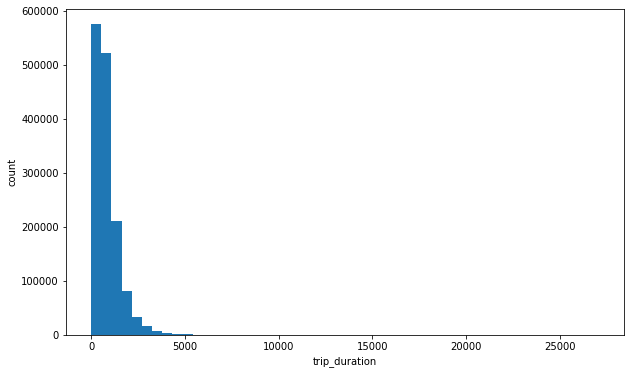

In [65]:
show_hist('trip_duration')

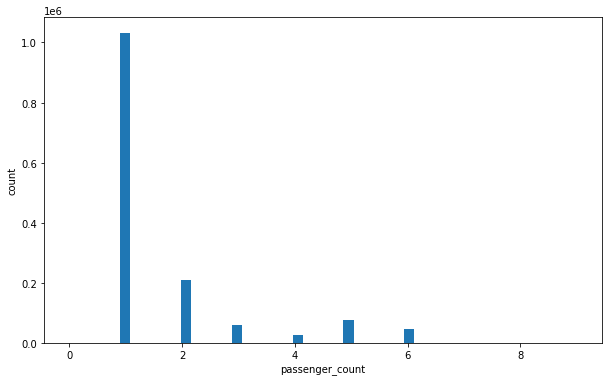

In [66]:
show_hist('passenger_count')

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

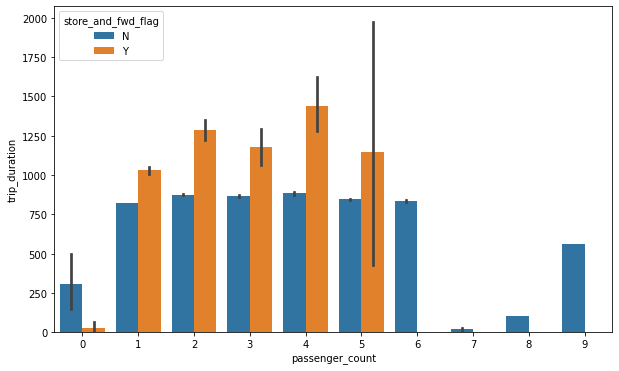

In [67]:
sns.barplot(x='passenger_count', y='trip_duration', hue='store_and_fwd_flag', data = train_df)

In [68]:
R = 6371

# The haversine distance which is the great-circle distance between two points on a sphere given their longitudes and latitudes
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * R * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

def direction(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [69]:
train_df.loc[:, 'haversine_distance'] = haversine_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'manhattan_distance'] = manhattan_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'direction'] = direction(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)

test_df.loc[:, 'haversine_distance'] = haversine_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'manhattan_distance'] = manhattan_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'direction'] = direction(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)

In [70]:
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week,haversine_distance,manhattan_distance,direction
82876,id3784463,2,2016-04-30 17:27:12,2016-04-30 17:33:49,1,-74.011276,40.723801,-74.008118,40.739391,N,397,2016-04-30,30,17,4,5,1.753913,1.999778,8.726891
361141,id0118632,1,2016-02-18 16:43:27,2016-02-18 17:16:27,1,-73.952438,40.783840,-73.992226,40.750504,N,1980,2016-02-18,18,16,2,3,4.996811,7.056736,-137.875931
190500,id0727305,2,2016-06-16 18:37:15,2016-06-16 19:19:06,1,-73.976761,40.765221,-74.005608,40.737583,N,2511,2016-06-16,16,18,6,3,3.917749,5.502565,-141.657336
282687,id3534042,2,2016-04-21 22:32:07,2016-04-21 23:01:27,2,-74.003609,40.726650,-73.966797,40.769962,N,1760,2016-04-21,21,22,4,3,5.728082,7.918103,32.764929
801469,id0271965,2,2016-01-02 10:56:48,2016-01-02 11:08:46,2,-73.953857,40.766342,-73.987831,40.749168,N,718,2016-01-02,2,10,1,5,3.440205,4.770787,-123.706067
612764,id1565529,1,2016-06-26 16:12:01,2016-06-26 16:22:09,1,-73.992455,40.730598,-73.985580,40.744225,N,608,2016-06-26,26,16,6,6,1.622073,2.094377,20.917022
439389,id2657494,2,2016-04-07 18:37:36,2016-04-07 18:53:26,2,-73.977837,40.753319,-73.987282,40.768608,N,950,2016-04-07,7,18,4,3,1.877005,2.495692,-25.072730
370920,id0155001,1,2016-02-11 08:56:22,2016-02-11 09:09:45,1,-73.981133,40.747108,-73.999779,40.720402,N,803,2016-02-11,11,8,2,3,3.359636,4.540428,-152.112817
1114038,id2170967,2,2016-04-01 22:00:29,2016-04-01 22:08:19,1,-73.983635,40.752884,-73.971771,40.754608,N,470,2016-04-01,1,22,4,4,1.017538,1.191052,79.135383
130669,id0488286,1,2016-04-08 20:51:50,2016-04-08 21:06:54,1,-74.010300,40.729813,-73.987419,40.742565,N,904,2016-04-08,8,20,4,4,2.393152,3.346000,53.655713


In [71]:
numerical_cols = ['haversine_distance', 'manhattan_distance', 'direction' ]
categorical_cols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'day', 'hour', 'month', 'week' ]

# Normalize the numerical columns to make sure they use the same scale
scaler = MinMaxScaler().fit(train_df[numerical_cols])
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Convert categorical data into dummy or indicator variables.
# We have few categorical columns and few classes for each column
# So, we can use the OneHotEncoder
def encode_categorical(df):
    for categorical in categorical_cols:
        encoded_cat = pd.get_dummies(df[categorical], prefix=categorical, prefix_sep='_')
        df = (df.drop([categorical], axis=1)).join(encoded_cat)
    return df
train_df = encode_categorical(train_df)
test_df = encode_categorical(test_df)

In [72]:
train_df.sample(10)

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_date,haversine_distance,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
878266,id1180227,2016-04-20 10:46:04,2016-04-20 10:50:57,-73.989799,40.757099,-73.995911,40.753922,293,2016-04-20,0.000503,...,1,0,0,0,0,1,0,0,0,0
361100,id3090880,2016-04-25 17:37:31,2016-04-25 17:42:24,-73.963127,40.769215,-73.966240,40.764481,293,2016-04-25,0.000474,...,1,0,0,1,0,0,0,0,0,0
200462,id1558637,2016-06-23 21:28:14,2016-06-23 21:37:10,-73.988091,40.737717,-74.001938,40.729504,536,2016-06-23,0.001194,...,0,0,1,0,0,0,1,0,0,0
181200,id0192018,2016-06-30 07:06:33,2016-06-30 08:08:51,-73.780640,40.645241,-73.976242,40.758991,3738,2016-06-30,0.016747,...,0,0,1,0,0,0,1,0,0,0
745188,id3101541,2016-01-16 13:38:53,2016-01-16 13:44:10,-73.976250,40.739895,-73.979202,40.746143,317,2016-01-16,0.000595,...,0,0,0,0,0,0,0,0,1,0
1181731,id1691855,2016-03-29 20:25:08,2016-03-29 20:34:49,-73.991699,40.738659,-73.981544,40.724686,581,2016-03-29,0.001429,...,0,0,0,0,1,0,0,0,0,0
199334,id3635466,2016-06-29 23:50:39,2016-06-30 00:04:05,-73.987869,40.732689,-73.982521,40.765041,806,2016-06-29,0.002922,...,0,0,1,0,0,1,0,0,0,0
756543,id3839524,2016-05-26 22:40:51,2016-05-26 22:48:04,-74.008072,40.721657,-73.996544,40.729919,433,2016-05-26,0.001078,...,0,1,0,0,0,0,1,0,0,0
1245930,id2101050,2016-02-06 12:56:41,2016-02-06 12:59:46,-73.989716,40.776348,-73.984955,40.782333,185,2016-02-06,0.000626,...,0,0,0,0,0,0,0,0,1,0
277537,id0157167,2016-02-05 11:41:47,2016-02-05 11:46:55,-73.969231,40.755962,-73.962448,40.755421,308,2016-02-05,0.000463,...,0,0,0,0,0,0,0,1,0,0


In [73]:
train_drop_cols = ['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
train_df = train_df.drop(train_drop_cols, axis = 1)
train_df.sample(10)

,trip_duration,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
812109,979,0.006144,0.007950,0.087493,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
945333,414,0.001322,0.001416,0.023884,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
402662,126,0.000418,0.000547,0.845990,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1228928,291,0.000448,0.000465,0.982670,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
236306,604,0.001253,0.001601,0.579692,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
136240,199,0.000654,0.000811,0.684462,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
150383,2409,0.008419,0.009226,0.221126,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
363550,1008,0.001916,0.002490,0.090494,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1228293,130,0.000357,0.000358,0.260974,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1272429,719,0.000839,0.001049,0.569474,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
test_drop_cols = ['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
test_df = test_df.drop(test_drop_cols, axis = 1)

In [75]:
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
4497,0.014701,0.019262,0.847019,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
236207,0.000925,0.001050,0.037565,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
440955,0.000413,0.000546,0.642988,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
251819,0.000693,0.000894,0.585010,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
407843,0.001134,0.001497,0.395125,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
243096,0.001158,0.001435,0.934428,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
294553,0.001549,0.002029,0.096605,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
477640,0.000000,0.000000,0.499990,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
102083,0.004909,0.004868,0.008773,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
620655,0.000923,0.001214,0.851339,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
# The test_df has 83 columns while train_df has 86 columns 
missed_cols = list(set(train_df.columns) - set(test_df.columns))
missed_cols

['passenger_count_8', 'passenger_count_7', 'trip_duration']

In [78]:
test_df['passenger_count_7'] = 0
test_df['passenger_count_8'] = 0
test_df = test_df[list(train_df.columns.values)[1:]]
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
560414,0.001725,0.001939,0.714965,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
622391,0.002496,0.002880,0.458082,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
496729,0.001149,0.001530,0.624851,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
74042,0.001779,0.002306,0.588476,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
580764,0.000366,0.000349,0.747908,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
417959,0.001723,0.001674,0.494775,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
238915,0.000965,0.000955,0.258457,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
110339,0.002145,0.002835,0.105877,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
60931,0.002165,0.002555,0.048496,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
135909,0.003265,0.003379,0.016787,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
